In [3]:
# =============================================================================
#
# Pronositco usando un modelo autoregresivo
#
# =============================================================================
import warnings

warnings.filterwarnings("ignore")

#
# Carga de datos
#
import nbimporter  #  type: ignore
import functions  #  type: ignore

df_orig = functions.load_data()
df_orig.head()


,yt_true
date,
1946-01-01,890
1946-02-01,992
1946-03-01,979
1946-04-01,959
1946-05-01,1110


In [4]:
#
# Remove trend and cycle to make the series stationary
#
df_orig = functions.remove_trend_and_cycle(df_orig, yt_true_name="yt_true")
df_orig.head(20)


,yt_true,yt_true_d1d12
date,,
1946-01-01,890,NaN
1946-02-01,992,NaN
1946-03-01,979,NaN
1946-04-01,959,NaN
1946-05-01,1110,NaN
1946-06-01,1546,NaN
1946-07-01,1539,NaN
1946-08-01,3401,NaN
1946-09-01,2092,NaN


In [5]:
#
# Construcción de la matriz de regresores
#
p_max = 13
df_orig = functions.make_lagged_ts(
    df=df_orig,
    p_max=p_max,
    y_column="yt_true_d1d12",
    fmt="lagged_{}m",
)
df_orig.head(20)

,yt_true,yt_true_d1d12,lagged_1m,lagged_2m,lagged_3m,lagged_4m,lagged_5m,lagged_6m,lagged_7m,lagged_8m,lagged_9m,lagged_10m,lagged_11m,lagged_12m,lagged_13m
date,,,,,,,,,,,,,,,
1946-01-01,890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1946-02-01,992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1946-03-01,979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1946-04-01,959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1946-05-01,1110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1946-06-01,1546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1946-07-01,1539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1946-08-01,3401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1946-09-01,2092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#
# Remoción de los valores faltantes
#
df_dropna = df_orig.dropna()


In [7]:
#
# División de los datos en entrenamiento y prueba
#
(
    X_complete,
    y_complete,
    X_train,
    y_train,
    X_test,
    y_test,
) = functions.train_test_split(
    df=df_dropna,
    x_columns=[f"lagged_{i}m" for i in range(1, 14)],
    y_column="yt_true_d1d12",
)

X_complete.head()

,lagged_1m,lagged_2m,lagged_3m,lagged_4m,lagged_5m,lagged_6m,lagged_7m,lagged_8m,lagged_9m,lagged_10m,lagged_11m,lagged_12m,lagged_13m
date,,,,,,,,,,,,,
1948-03-01,35.0,-427.0,-82.0,86.0,-208.0,542.0,-352.0,202.0,-216.0,-92.0,42.0,203.0,-73.0
1948-04-01,-63.0,35.0,-427.0,-82.0,86.0,-208.0,542.0,-352.0,202.0,-216.0,-92.0,42.0,203.0
1948-05-01,-78.0,-63.0,35.0,-427.0,-82.0,86.0,-208.0,542.0,-352.0,202.0,-216.0,-92.0,42.0
1948-06-01,178.0,-78.0,-63.0,35.0,-427.0,-82.0,86.0,-208.0,542.0,-352.0,202.0,-216.0,-92.0
1948-07-01,-41.0,178.0,-78.0,-63.0,35.0,-427.0,-82.0,86.0,-208.0,542.0,-352.0,202.0,-216.0


In [8]:
#
# Pronostico usando regresión lineal
#
from sklearn.linear_model import LinearRegression


def create_pipeline():
    """Creates a linear regression model."""
    return LinearRegression()


In [9]:
#
# Entrenamiento y pronostico
#
hidden = 4
pipeline = create_pipeline()
pipeline.fit(X_train, y_train)
df_dropna[f"yt_d1d12_ar{p_max}"] = pipeline.predict(X_complete)

df_orig.loc[df_dropna.index, f"yt_d1d12_ar{p_max}"] = df_dropna[f"yt_d1d12_ar{p_max}"]

df_orig[["yt_true", "yt_true_d1d12", f"yt_d1d12_ar{p_max}"]].head(40)


,yt_true,yt_true_d1d12,yt_d1d12_ar13
date,,,
1946-01-01,890,NaN,NaN
1946-02-01,992,NaN,NaN
1946-03-01,979,NaN,NaN
1946-04-01,959,NaN,NaN
1946-05-01,1110,NaN,NaN
1946-06-01,1546,NaN,NaN
1946-07-01,1539,NaN,NaN
1946-08-01,3401,NaN,NaN
1946-09-01,2092,NaN,NaN


In [10]:
#
# Integración simple y estacional
#
import numpy as np  #  type: ignore

df_orig = df_orig.assign(yt_pred_d1d13_ar13=np.nan)
df_orig.loc[df_dropna.index, "yt_pred_d1d13_ar13"] = df_dropna["yt_d1d12_ar13"]
df_orig["yt_pred_d1d13_ar13"] += df_orig["yt_true"].shift(1)
df_orig["yt_pred_d1d13_ar13"] += df_orig["yt_true"].shift(12)
df_orig["yt_pred_d1d13_ar13"] -= df_orig["yt_true"].shift(13)
df_orig[["yt_true", "yt_pred_d1d13_ar13"]].head(40)

,yt_true,yt_pred_d1d13_ar13
date,,
1946-01-01,890,NaN
1946-02-01,992,NaN
1946-03-01,979,NaN
1946-04-01,959,NaN
1946-05-01,1110,NaN
1946-06-01,1546,NaN
1946-07-01,1539,NaN
1946-08-01,3401,NaN
1946-09-01,2092,NaN


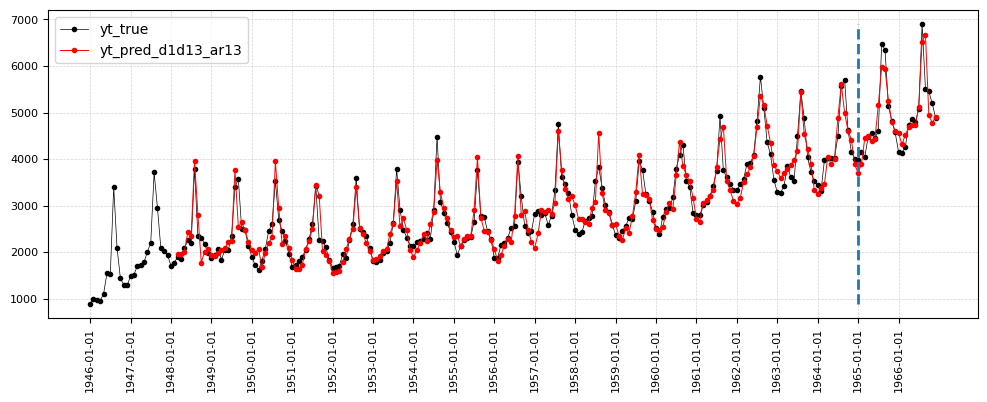

In [11]:
#
# Gráfico de los pronósticos
#
functions.plot_time_series(df=df_orig, yt_col="yt_true")


In [12]:
#
# Almacenamiento de los resultados
#
functions.save_forecasts(df_orig)


In [13]:
metrics = functions.compute_evaluation_metrics(df_orig.dropna())
functions.save_metrics(metrics)
metrics


,Metrics,yt_pred_d1d13_ar13
0,MSE Train,66646.65
1,MSE Test,138815.45
2,MAE Train,188.42
3,MAE Test,267.05
